<a href="https://colab.research.google.com/github/CamilleGreen5/Deep_Learning_with_Python/blob/master/newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, )

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

coded_review = train_data[0]
decoded_review = ''.join(
    reverse_word_index.get(i - 3, '?') + ' ' for i in coded_review)

# print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
  
  def to_one_hot()

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print('len x_train = ', len(partial_x_train))
print('len x_val = ', len(x_val))

len x_train =  15000
len x_val =  10000


In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=256, validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

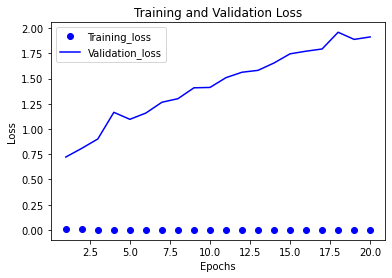

In [ ]:
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training_loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

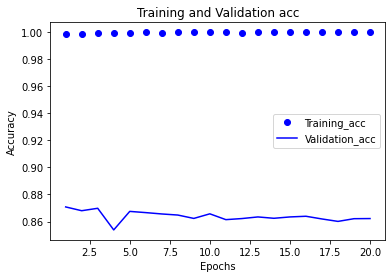

In [ ]:
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc_values, 'bo', label='Training_acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation_acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions = np.where(predictions<0.5, 0, 1)
print(predictions)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]
